In [1]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.mosaicplot import mosaic

In [2]:
#IMDB Data
basic_movie = pd.read_csv('data-4.tsv', sep = '\t')

/var/folders/8p/7xpb2gqn3h342rcbzmt9x8wh0000gn/T/ipykernel_39780/3581119419.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  basic_movie = pd.read_csv('data-4.tsv', sep = '\t')


In [3]:
movie = basic_movie[['tconst', 'titleType', 'primaryTitle', 'startYear', 'genres']]
movie_trunc = movie[movie.titleType == 'movie']

In [4]:
movie_trunc.head()

,tconst,titleType,primaryTitle,startYear,genres
8,tt0000009,movie,Miss Jerry,1894,Romance
498,tt0000502,movie,Bohemios,1905,\N
570,tt0000574,movie,The Story of the Kelly Gang,1906,"Action,Adventure,Biography"
587,tt0000591,movie,The Prodigal Son,1907,Drama
610,tt0000615,movie,Robbery Under Arms,1907,Drama


In [5]:
movielens = pd.read_csv('movielens.csv')

In [6]:
movielens.drop('Unnamed: 0', inplace = True, axis = 1)

In [7]:
movielens.head()

,movieId,tag,imdbId,tmdbId
0,260,classic,76759,11.0
1,260,sci-fi,76759,11.0
2,260,action,76759,11.0
3,260,adventure,76759,11.0
4,260,fantasy,76759,11.0


In [8]:
critic_ratings = pd.read_csv('ratings.csv')

In [9]:
critic_ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [10]:
user_ratings = pd.read_csv('data.tsv', sep = '\t')

In [11]:
user_ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1920
1,tt0000002,5.8,260
2,tt0000003,6.5,1728
3,tt0000004,5.6,173
4,tt0000005,6.2,2541


In [12]:
tmdb = pd.read_csv('tmdb.csv')

In [13]:
tmdb.drop('Unnamed: 0', inplace = True, axis = 1)
tmdb.head()

,imdb_id,id,revenue,budget
0,76759,11,775398007,11000000
1,118715,115,46969409,15000000
2,62512,667,111584787,9500000
3,425210,186,56308881,27000000
4,2872718,242582,50300000,8500000


### 1. Exploring the average rating for each genre and for each movie issue type. Displaying the same in a bar graphs.

In [14]:
a = pd.merge(movie_trunc, user_ratings, on= 'tconst')
a['genres1'] = a.genres.str.split(',')
a = a.explode('genres1')
avg = a.groupby(['genres1']).mean()
avg = avg[:-1]

Text(0.5, 1.0, 'Average Rating per Genre')

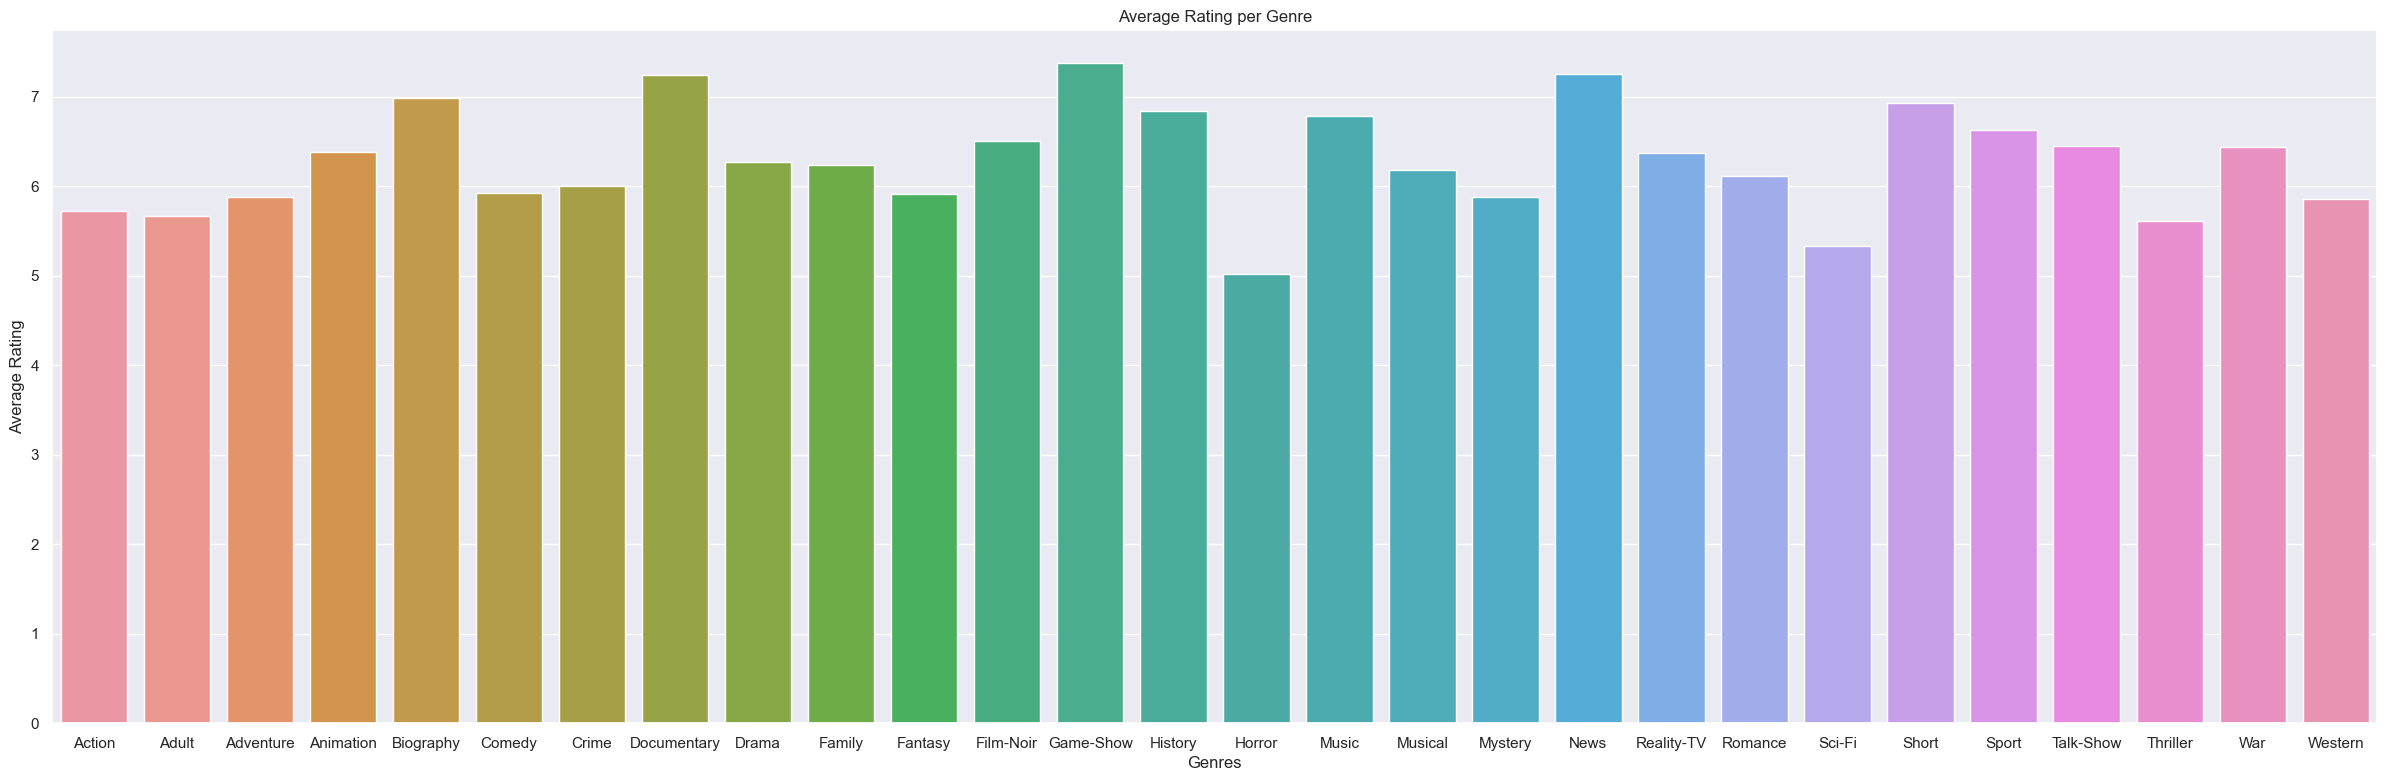

In [15]:
sns.set(rc={'figure.figsize':(30, 9)})
ax = sns.barplot(avg, y = 'averageRating', x = avg.index)
ax.set_xlabel('Genres')
ax.set_ylabel('Average Rating')
plt.title('Average Rating per Genre')

In [16]:
#Social issue
movie_trunc['id'] = movie_trunc.tconst.str[2:9]
movie_trunc['id'] = movie_trunc['id'].astype('int')
movielens['imdbid'] = movielens['imdbId'].astype('int')
b = pd.merge(movie_trunc, movielens, left_on= 'id', right_on = 'imdbid')
b['genres'] = b.genres.str.split(',')
b = b.explode('genres')
b['social'] = b.tag.str.split(' ')
b = b.explode('social')

/var/folders/8p/7xpb2gqn3h342rcbzmt9x8wh0000gn/T/ipykernel_39780/1974829753.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_trunc['id'] = movie_trunc.tconst.str[2:9]
/var/folders/8p/7xpb2gqn3h342rcbzmt9x8wh0000gn/T/ipykernel_39780/1974829753.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_trunc['id'] = movie_trunc['id'].astype('int')


In [17]:
def categories(x):
    tokens = {'racial' : ['racism', 'racial', 'discrimination', 'segregation', 'racist', 'civil', 'black', 'african', 'race'],
              'addiction' : ['drug', 'drugs', 'abuse', 'depression', 'addiction', 'depressing', 'suicide', 'psychiatrist',
                            'mental', 'addict', 'abandonment', 'alcoholism'],
              'rights': ['gay', 'queer', 'lgbt', 'lesbian', 'bisexual', 'homosexuality', 'transgender'],
              'social': ['social', 'social commentary', 'social criticism','societal', 'bully', 'bullying', 'pollution', 'corruption', 'crisis'],
              'empowerment': ['sexist', 'strong female lead', 'strong woman', 'strong women', 'woman', 'women'],
              'immigration': ['immigration', 'culture']}
    for i, j in tokens.items():
        if(x in j):
            return i
    return np.nan

In [18]:
b['social_cat'] = b['social'].map(categories)

In [19]:
b1 = b.dropna(subset=['social_cat'])

In [20]:
b2 = pd.merge(b1, user_ratings, on = 'tconst')

In [21]:
avg2 = b2.groupby('social_cat')[['averageRating']].mean()

Text(0, 0.5, 'Average Rating')

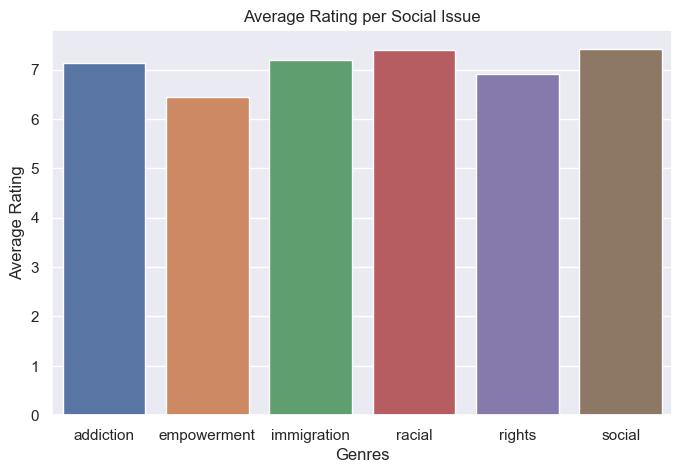

In [22]:
sns.set(rc={'figure.figsize':(8, 5)})
ax = sns.barplot(avg2, y = 'averageRating', x = avg2.index)
plt.title('Average Rating per Social Issue')
ax.set_xlabel('Genres')
ax.set_ylabel('Average Rating')


In [23]:
#Mosaic plot
cross = crosstable = pd.crosstab(b2['genres'], b2['social_cat'])
cross = cross[: -2]

Text(0.5, 1.0, 'Disribution of social issues within Genres')

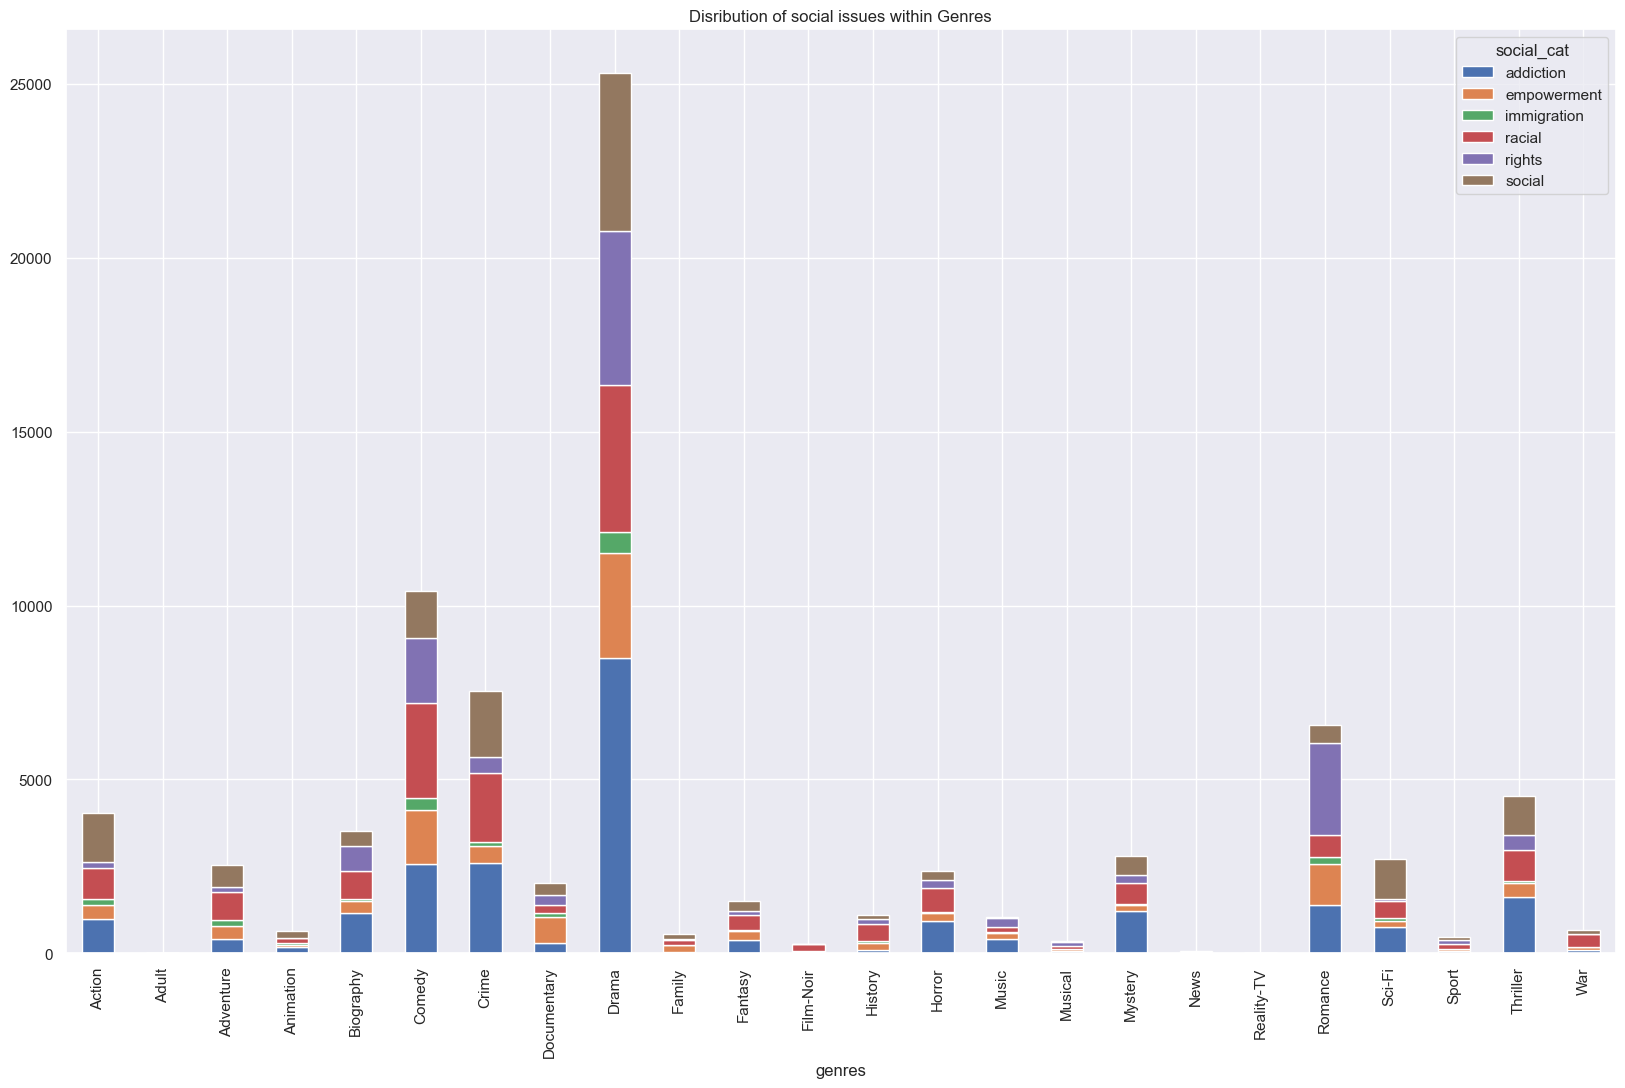

In [24]:
plt.rcParams["figure.figsize"] = [20, 12]
cross.plot(kind="bar", stacked = True)
plt.title('Disribution of social issues within Genres')

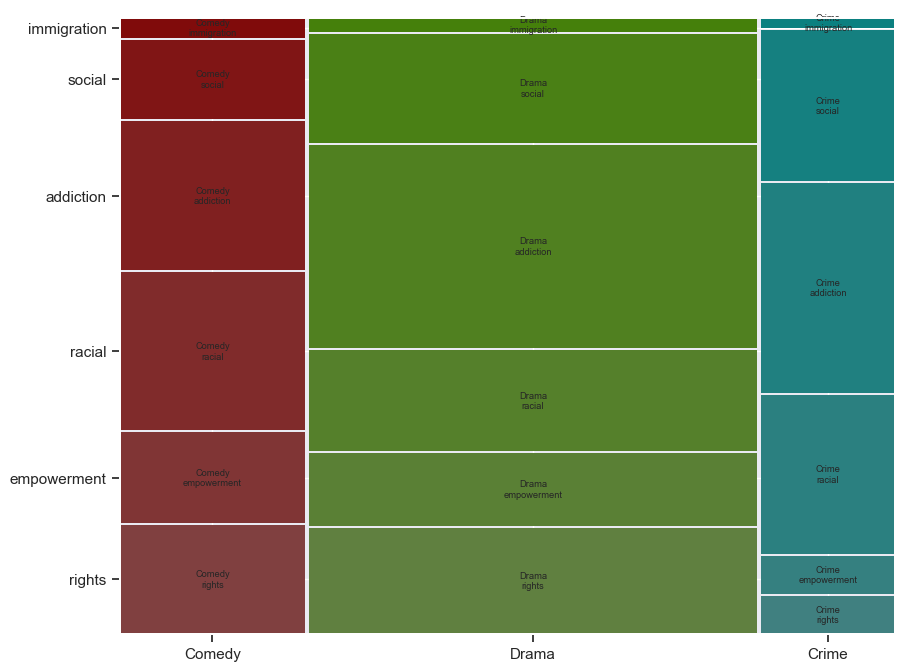

In [25]:
plt.rcParams["figure.figsize"] = [10, 8]
plt.rcParams.update({'font.size': 8})
plt.rc('axes', labelsize = 10)
val = mosaic(b2[(b2.genres == "Drama") | (b2.genres == 'Crime') | (b2.genres == 'Comedy')],
             ['genres', 'social_cat'], gap=0.005)

In [26]:
plt.rcParams["figure.figsize"] = [12, 5]

### 2(a). Finding the distribution of revenue and budget values.

In [27]:
tmdb1 = tmdb[(tmdb.revenue >= 20000) & (tmdb.budget >= 20000)]

In [28]:
tmdb1['revenue1'] = round(tmdb1['revenue']/1000000, 3).astype('float')
tmdb1['budget1'] = round(tmdb1['budget']/1000000, 3).astype('float')

/var/folders/8p/7xpb2gqn3h342rcbzmt9x8wh0000gn/T/ipykernel_39780/196033827.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmdb1['revenue1'] = round(tmdb1['revenue']/1000000, 3).astype('float')
/var/folders/8p/7xpb2gqn3h342rcbzmt9x8wh0000gn/T/ipykernel_39780/196033827.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmdb1['budget1'] = round(tmdb1['budget']/1000000, 3).astype('float')


Text(0.5, 0, 'Revenue(in millions)')

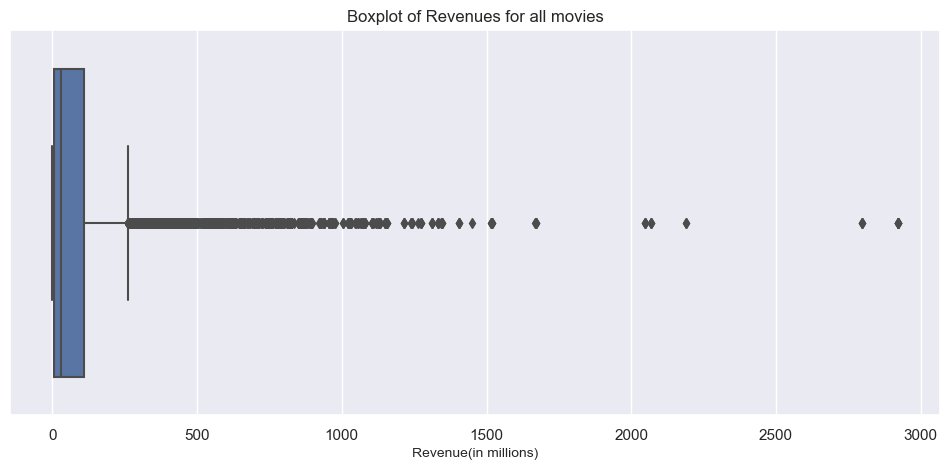

In [29]:
sns.boxplot(x = tmdb1['revenue1'])
plt.title('Boxplot of Revenues for all movies')
plt.xlabel('Revenue(in millions)')

Text(0.5, 0, 'Budget(in millions)')

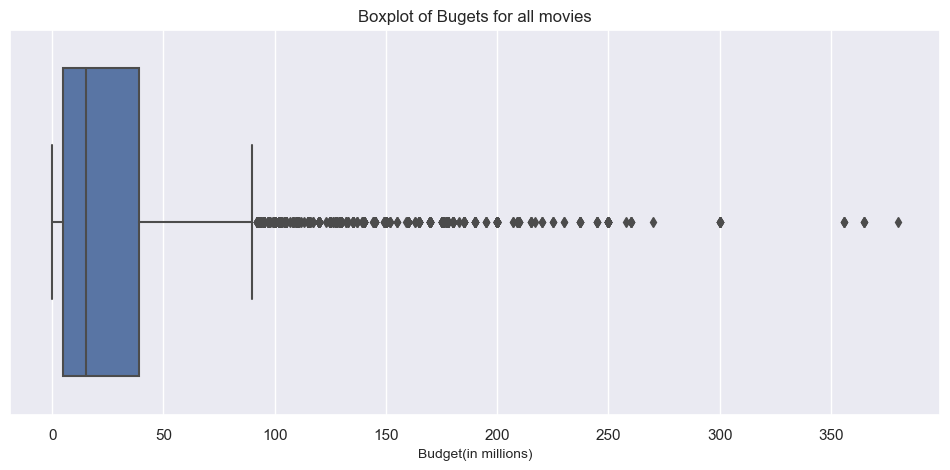

In [30]:
sns.boxplot(x = tmdb1['budget1'])
plt.title('Boxplot of Bugets for all movies')
plt.xlabel('Budget(in millions)')

### 2(b). Exploring the revenue and budget generated by indie movies across various genres and social issue categories.

In [31]:
tmdb2 = tmdb[(tmdb.budget <= 12000000) & (tmdb.budget > 10000) & (tmdb.revenue > 1000)]

In [32]:
tmdb2['revenue1'] = round(tmdb2['revenue']/1000000, 3).astype('float')
tmdb2['budget1'] = round(tmdb2['budget']/1000000, 3).astype('float')

/var/folders/8p/7xpb2gqn3h342rcbzmt9x8wh0000gn/T/ipykernel_39780/2102152105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmdb2['revenue1'] = round(tmdb2['revenue']/1000000, 3).astype('float')
/var/folders/8p/7xpb2gqn3h342rcbzmt9x8wh0000gn/T/ipykernel_39780/2102152105.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmdb2['budget1'] = round(tmdb2['budget']/1000000, 3).astype('float')


Text(0.5, 0, 'Budget(in millions)')

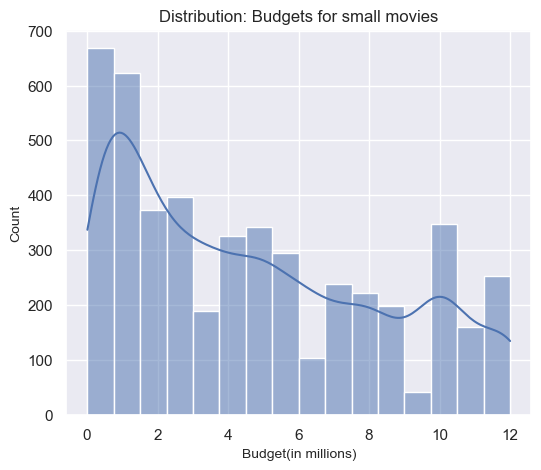

In [33]:
plt.rcParams["figure.figsize"] = [6, 5]
sns.histplot(tmdb2, x = 'budget1', kde = True)
plt.title('Distribution: Budgets for small movies')
plt.xlabel('Budget(in millions)')

Text(0.5, 0, 'Revenue(in millions)')

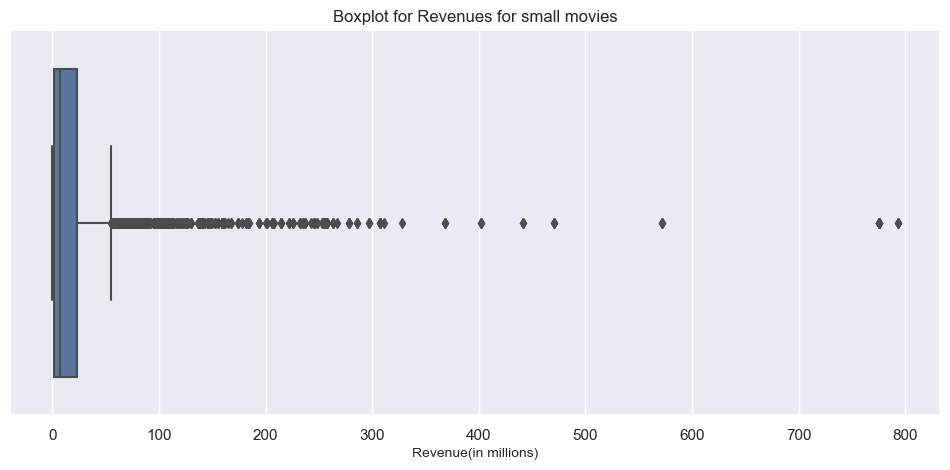

In [34]:
plt.rcParams["figure.figsize"] = [12, 5]
sns.boxplot(tmdb2, x = 'revenue1')
plt.title('Boxplot for Revenues for small movies')
plt.xlabel('Revenue(in millions)')

Text(0.5, 0, 'Revenue(in millions)')

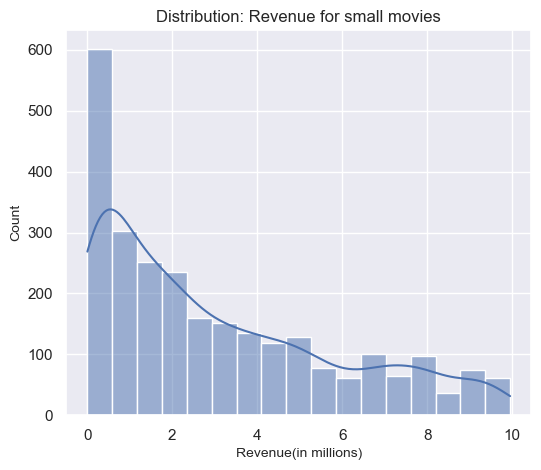

In [35]:
plt.rcParams["figure.figsize"] = [6, 5]
sns.histplot(tmdb2[tmdb2.revenue < 10000000], x = 'revenue1', kde = True)
plt.title('Distribution: Revenue for small movies')
plt.xlabel('Revenue(in millions)')

In [36]:
b3 = pd.merge(tmdb2, movie_trunc, left_on = 'imdb_id', right_on = 'id')
b4 = pd.merge(b3, user_ratings, on = 'tconst')
b4 = b4.drop_duplicates(subset= ['imdb_id'])
b4['genres1'] = b4.genres.str.split(',')
b4 = b4.explode('genres1')
avg3 = b4.groupby(['genres1'])['revenue', 'budget'].mean()
avg3 = avg3[: -1]

/var/folders/8p/7xpb2gqn3h342rcbzmt9x8wh0000gn/T/ipykernel_39780/483600439.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg3 = b4.groupby(['genres1'])['revenue', 'budget'].mean()


Text(0, 0.5, 'Mean Revenue in ten millions')

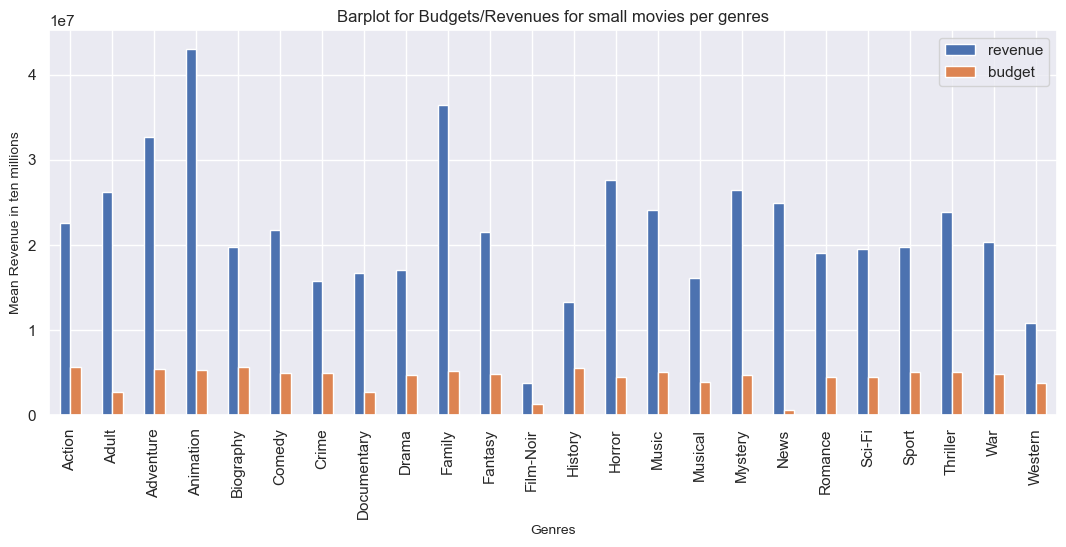

In [37]:
plt.rcParams["figure.figsize"] = [13, 5]
avg3.plot(kind = 'bar')
plt.title('Barplot for Budgets/Revenues for small movies per genres')
plt.xlabel('Genres')
plt.ylabel('Mean Revenue in ten millions')

In [38]:
temp = pd.merge(movie_trunc, movielens, left_on= 'id', right_on = 'imdbid')
temp['social'] = temp.tag.str.split(' ')
temp = temp.explode('social')

In [39]:
temp['social_cat'] = temp['social'].map(categories)
temp['social_no'] = temp['social_cat'].isnull()

In [40]:
#Combine social cats into one
temp1 = temp.groupby('id')['social_no'].agg(['sum','count'])

In [41]:
temp1['diff'] = temp1['count'] - temp1['sum']
temp1['is_social'] = temp1['diff'] >= 1

In [42]:
b5 = pd.merge(tmdb2, temp, left_on = 'imdb_id', right_on = 'imdbId')
b6 = pd.merge(b5, user_ratings, on = 'tconst')
b6 = b6.drop_duplicates()

In [43]:
avg4 = b6.groupby(['social_cat'])['revenue', 'budget'].mean()

/var/folders/8p/7xpb2gqn3h342rcbzmt9x8wh0000gn/T/ipykernel_39780/3478519159.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg4 = b6.groupby(['social_cat'])['revenue', 'budget'].mean()


Text(0, 0.5, 'Mean Revenue in ten millions')

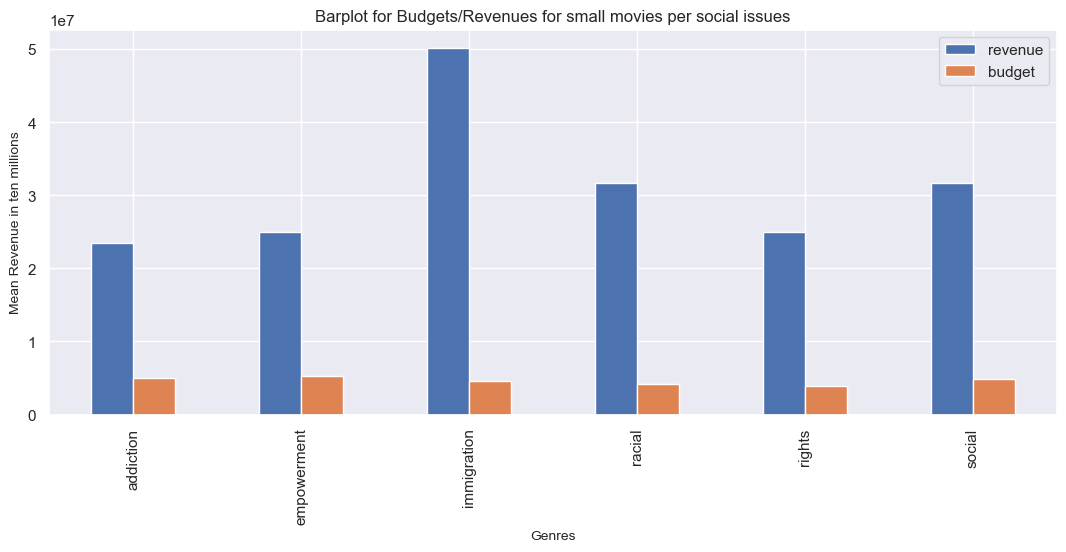

In [44]:
plt.rcParams["figure.figsize"] = [13, 5]
avg4.plot(kind = 'bar')
plt.title('Barplot for Budgets/Revenues for small movies per social issues')
plt.xlabel('Genres')
plt.ylabel('Mean Revenue in ten millions')

### 3. Prediction of user ratings using the multitude of columns in the data. The idea is to predict the user rating of a movie based on factors like social awareness, theme, runtime. 

In [45]:
movie1 = basic_movie[basic_movie.titleType == 'movie']
movie1['id'] = movie1.tconst.str[2:9]
movie1 = movie1[['tconst', 'id', 'isAdult', 'startYear', 'runtimeMinutes']]
movie1['id'] = movie1['id'].astype('int')

/var/folders/8p/7xpb2gqn3h342rcbzmt9x8wh0000gn/T/ipykernel_39780/3854800258.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie1['id'] = movie1.tconst.str[2:9]


In [46]:
movie2 = pd.merge(movie1, tmdb, left_on= 'id', right_on = 'imdb_id')

In [47]:
temp2 = temp[['social_cat',  'imdbId']]

In [48]:
temp3 = pd.merge(temp1.reset_index(), temp2.dropna(), left_on = 'id', right_on = 'imdbId', how = 'left')

In [49]:
movie3 = pd.merge(movie2 , temp3 , left_on= 'imdb_id', right_on = 'id')

In [50]:
movie4 = pd.merge(movie3, user_ratings, on = 'tconst')

In [51]:
#Dropping duplicates

movie4.drop_duplicates()
movie4 = movie4[(movie4.startYear != '\\N') & (movie4.runtimeMinutes != '\\N')]

In [52]:
#Converting data types
movie4.startYear = movie4.startYear.astype('int64')
movie4.runtimeMinutes = movie4.runtimeMinutes.astype('int64')

In [53]:
model = smf.ols('averageRating ~ startYear + runtimeMinutes + revenue + budget + diff + social_cat + numVotes', data = movie4).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          averageRating   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     5586.
Date:                Thu, 08 Dec 2022   Prob (F-statistic):               0.00
Time:                        11:15:57   Log-Likelihood:                -64429.
No. Observations:               66715   AIC:                         1.289e+05
Df Residuals:                   66703   BIC:                         1.290e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    20.6878      0.310     66.646      0.000      20.079      21.296
social_cat[T.empowerment]    -0.3853      0.009    -41.587      0.000      -0.403      -0.367
social_cat[T.immigration]     0.0977      0.015      6.313      0.000       0.067       0.128
social_cat[T.racial]          0.1541      0.007     22.082      0.000       0.140       0.168
social_cat[T.rights]         -0.0117      0.008     -1.467      0.143      -0.027       0.004
social_cat[T.social]          0.1097      0.007     15.297      0.000       0.096       0.124
startYear                    -0.0073      0.000    -47.260      0.000      -0.008      -0.007
runtimeMinutes                0.0087      0.000     71.080      0.000       0.009       0.009
revenue                    6.684e-11   1.32e-11      5.046      0.000    4.09e-11    9.28e-11
budget                    -3.587e-09    1.1e-10    -32.714      0.000    -3.8e-09   -3.37e-09
diff                          0.0018   4.06e-05     45.122      0.000       0.002       0.002
numVotes                   8.562e-07   9.04e-09     94.744      0.000    8.38e-07    8.74e-07
==============================================================================
Omnibus:                    21920.063   Durbin-Watson:                   0.612
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           118604.931
Skew:                          -1.488   Prob(JB):                         0.00
Kurtosis:                       8.815   Cond. No.                     4.22e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.22e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 4. There are tags for each movie left by a reviewer, these tags are analyzed using a tag genome for their actual relation to the movie. We can draw a distribution to check how accurate on average these tags are to their respective movies.

In [54]:
genome_score = pd.read_csv('genome-scores.csv')

Text(0.5, 1.0, 'Boxplot for Genome scores')

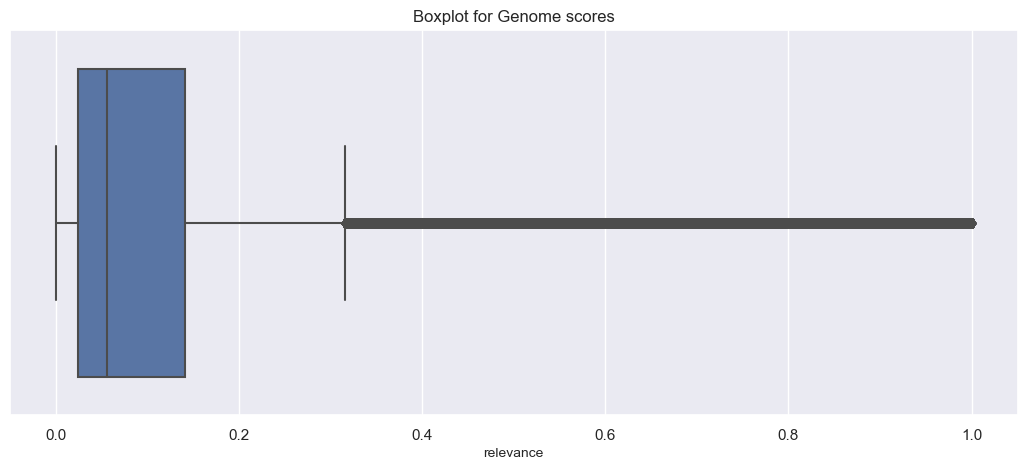

In [55]:
sns.boxplot(genome_score, x = 'relevance')
plt.title('Boxplot for Genome scores')

Text(0.5, 1.0, 'Distribution for Genome scores')

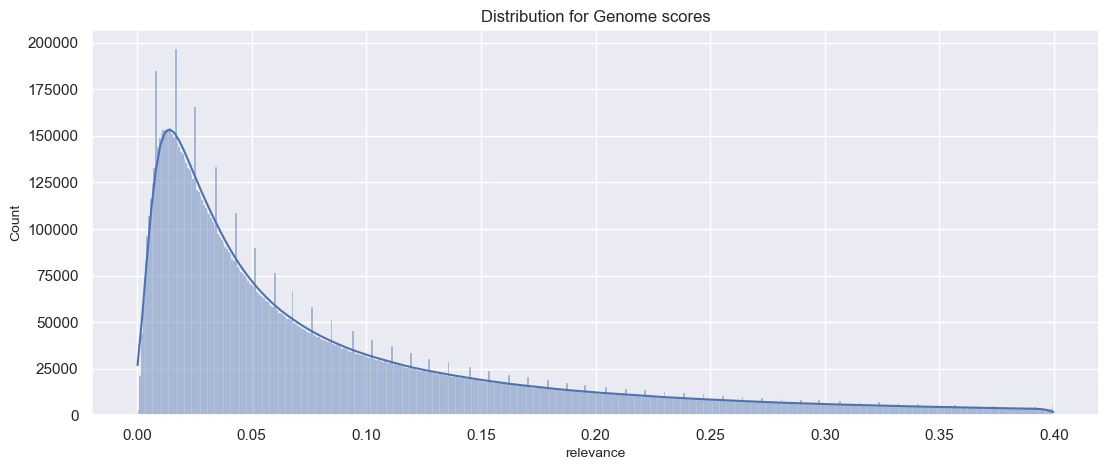

In [56]:
sns.histplot(genome_score[genome_score.relevance < 0.4], x = 'relevance', kde = True)
plt.title('Distribution for Genome scores')